In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Use the citipy module to determine city based on latitude and longitude
from citipy import citipy

In [3]:
# Import the requests library.
import requests

# Import the API key.
from Config import weather_api_key

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.i
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    if city not in cities:
        cities.append(city)
        
len(cities)

625

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2d32bc8af73d788ac9539ef6ef5f58f


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sinnamary
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | lompoc
Processing Record 4 of Set 1 | chokurdakh
Processing Record 5 of Set 1 | wrentham
Processing Record 6 of Set 1 | hilo
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | dikson
Processing Record 11 of Set 1 | bilma
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | talcahuano
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | northam
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | codrington
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | berlevag
Processing Record 21 of Set 1 | lubango
Processing Record 22 of Set 1 | albany
Processing Record 23 of Set 1 | port elizabeth
Processin

Processing Record 37 of Set 4 | salalah
Processing Record 38 of Set 4 | zhangjiakou
Processing Record 39 of Set 4 | kokopo
Processing Record 40 of Set 4 | krasnoselkup
Processing Record 41 of Set 4 | tasiilaq
Processing Record 42 of Set 4 | oussouye
Processing Record 43 of Set 4 | ulaangom
Processing Record 44 of Set 4 | tonosho
Processing Record 45 of Set 4 | shu
Processing Record 46 of Set 4 | ancud
Processing Record 47 of Set 4 | rincon
Processing Record 48 of Set 4 | ponta do sol
Processing Record 49 of Set 4 | provideniya
Processing Record 50 of Set 4 | georgetown
Processing Record 1 of Set 5 | pevek
Processing Record 2 of Set 5 | klaksvik
Processing Record 3 of Set 5 | lavrentiya
Processing Record 4 of Set 5 | namibe
Processing Record 5 of Set 5 | hibbing
Processing Record 6 of Set 5 | srono
Processing Record 7 of Set 5 | inirida
Processing Record 8 of Set 5 | bugene
Processing Record 9 of Set 5 | waddan
Processing Record 10 of Set 5 | turukhansk
Processing Record 11 of Set 5 | e

Processing Record 32 of Set 8 | gorno-altaysk
Processing Record 33 of Set 8 | edgewater
Processing Record 34 of Set 8 | gibara
Processing Record 35 of Set 8 | barranca
Processing Record 36 of Set 8 | aban
Processing Record 37 of Set 8 | novoagansk
Processing Record 38 of Set 8 | redding
Processing Record 39 of Set 8 | kindu
Processing Record 40 of Set 8 | bairiki
Processing Record 41 of Set 8 | mamallapuram
Processing Record 42 of Set 8 | tuggurt
City not found. Skipping...
Processing Record 43 of Set 8 | sayyan
Processing Record 44 of Set 8 | sambava
Processing Record 45 of Set 8 | yar-sale
Processing Record 46 of Set 8 | strezhevoy
Processing Record 47 of Set 8 | kieta
Processing Record 48 of Set 8 | san cristobal
Processing Record 49 of Set 8 | aguimes
Processing Record 50 of Set 8 | ribnitz-damgarten
Processing Record 1 of Set 9 | chernyshevskiy
Processing Record 2 of Set 9 | arona
Processing Record 3 of Set 9 | lagoa
Processing Record 4 of Set 9 | ewo
Processing Record 5 of Set 9 

Processing Record 20 of Set 12 | khani
Processing Record 21 of Set 12 | murdochville
Processing Record 22 of Set 12 | anamur
Processing Record 23 of Set 12 | qui nhon
Processing Record 24 of Set 12 | burns lake
Processing Record 25 of Set 12 | conceicao da barra
Processing Record 26 of Set 12 | larreynaga
Processing Record 27 of Set 12 | camden
Processing Record 28 of Set 12 | itaqui
Processing Record 29 of Set 12 | nome
Processing Record 30 of Set 12 | mehriz
Processing Record 31 of Set 12 | wajima
Processing Record 32 of Set 12 | tateyama
Processing Record 33 of Set 12 | puerto madero
Processing Record 34 of Set 12 | taos
Processing Record 35 of Set 12 | batemans bay
Processing Record 36 of Set 12 | uaua
Processing Record 37 of Set 12 | sakakah
Processing Record 38 of Set 12 | hamilton
Processing Record 39 of Set 12 | mandalgovi
Processing Record 40 of Set 12 | zagra
Processing Record 41 of Set 12 | liverpool
Processing Record 42 of Set 12 | kuche
City not found. Skipping...
Processi

In [10]:
len(city_data)

580

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sinnamary,5.3833,-52.9500,80.87,81,96,9.01,GF,2021-04-03 16:44:29
1,Vaini,-21.2000,-175.2000,75.20,94,75,6.91,TO,2021-04-03 16:44:29
2,Lompoc,34.6391,-120.4579,51.80,82,38,3.44,US,2021-04-03 16:44:29
3,Chokurdakh,70.6333,147.9167,-24.79,100,63,4.45,RU,2021-04-03 16:44:29
4,Wrentham,42.0668,-71.3281,45.00,23,1,10.36,US,2021-04-03 16:44:29
5,Hilo,19.7297,-155.0900,68.00,88,75,3.09,US,2021-04-03 16:44:29
6,Busselton,-33.6500,115.3333,64.99,78,100,4.00,AU,2021-04-03 16:44:29
7,Jamestown,42.0970,-79.2353,46.00,33,1,10.36,US,2021-04-03 16:44:29
8,Mataura,-46.1927,168.8643,57.00,63,40,13.00,NZ,2021-04-03 16:44:30
9,Dikson,73.5069,80.5464,-19.14,83,34,5.77,RU,2021-04-03 16:44:30


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

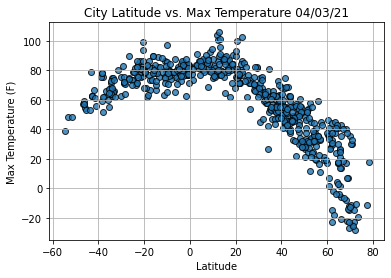

In [14]:
# Import the time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

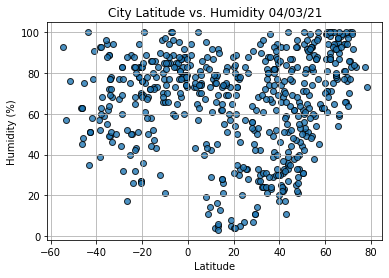

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

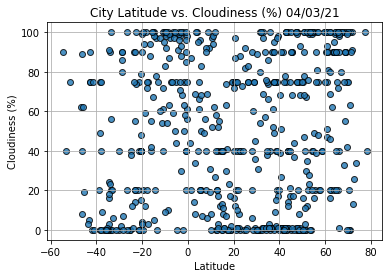

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


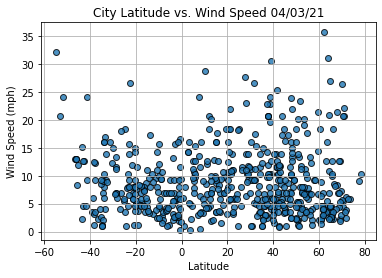

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label,text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.title(title)
    plt.ylabel(y_label)
    plt.show()

In [19]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

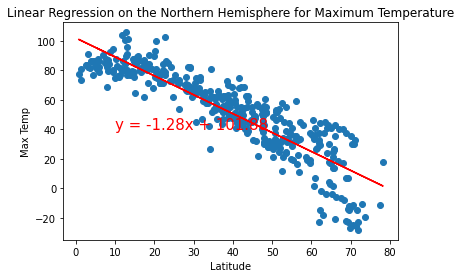

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))
plt.show()

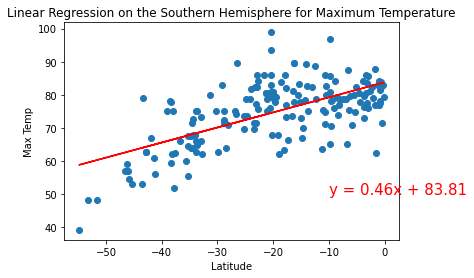

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-10,50))

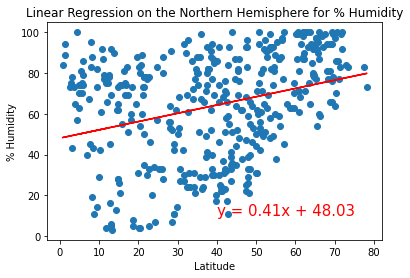

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))


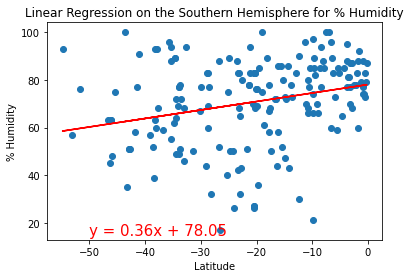

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))


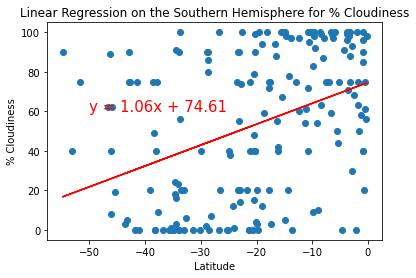

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

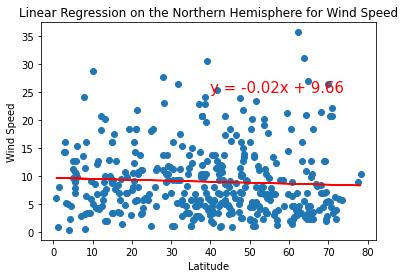

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,25))

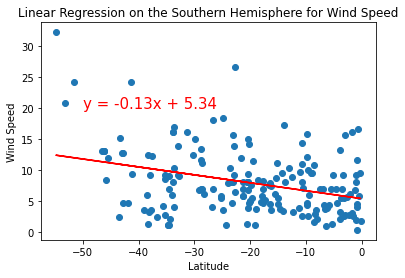

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for Wind Speed',
                       'Wind Speed',(-50,20))